In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import open3d as o3d
import time

In [19]:
pcd = o3d.io.read_point_cloud("ImageCloud/depth_ply/000005.ply")
o3d.visualization.draw_geometries([pcd])

In [8]:
np.ones_like(pcd.colors)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=25):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='o', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [4]:
from segment_anything import SamPredictor, sam_model_registry

In [6]:
image = cv2.imread('ImageCloud/rgb_ply/000040.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
sam = sam_model_registry["vit_h"]("sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

In [7]:
# JOINTS
input_points = np.array([[186.88964465, 476.07212664],
       [227.74956791, 449.52352253],
       [ 57.64132871, 464.47986589],
       [160.63784635, 393.91286899],
       [208.85332722, 381.41316297],
       [229.16645897, 383.83093588],
       [ 14.01106041, 445.20971905],
       [123.88104702, 369.93421791],
       [146.07395807, 418.24018671],
       [126.6031357 , 458.11893732],
       [ 91.92634308, 378.12221412],
       [105.0795661 , 427.76988708],
       [ 80.39374448, 472.37087335],
       [ 43.69078279, 387.60454777],
       [ 65.78245847, 423.98910181],
       [ 56.19003872, 459.76628084],
       [842.40925226, 475.45627661],
       [769.8025985 , 377.74275782],
       [821.70589557, 466.22955491],
       [709.5181026 , 446.54095421],
       [626.49942398, 407.25075408],
       [582.18968055, 393.99953524],
       [816.61605307, 449.18140404],
       [758.90362039, 337.89818467],
       [659.21231437, 331.42312293],
       [597.09763975, 324.55656222],
       [557.4255937 , 319.18723021],
       [808.89428581, 442.15926833],
       [743.99406976, 321.53592102],
       [629.66332558, 299.22128999],
       [566.59601032, 304.24907151],
       [525.10076959, 305.0077734 ],
       [797.76923179, 432.99867489],
       [720.77388597, 320.7704136 ],
       [635.55785829, 284.13820947],
       [586.03322456, 302.15274236],
       [550.20459127, 324.43867147],
       [786.75897436, 430.45075698],
       [702.33888818, 322.81514421],
       [658.11810853, 274.03534277],
       [618.18820698, 263.37169268],
       [589.0791952 , 267.26803954]])
input_points = np.array([p for p in input_points if p[0] < 860 and p[0] > 0 and p[1] < 504 and p[1] > 0])
input_labels = np.array(np.ones(len(input_points)))

In [119]:
# Object points
input_points = np.array([[502.98139907, 412.33973555],
       [316.07616215, 438.48209584],
       [662.94446299, 352.69776408],
       [441.61866943, 417.05959271],
       [507.75925532, 427.16941357],
       [658.71291868, 226.18641808],
       [652.20809213, 339.21434216],
       [750.76080117, 501.7991243 ],
       [549.70872481, 431.91961673],
       [224.62097907, 465.77981997],
       [693.89033989, 400.36199042],
       [829.83068023, 360.94774438],
       [607.00625604, 363.65007485],
       [423.39447634, 454.52042837],
       [209.71710506, 418.34418825],
       [657.45487061, 379.73898731],
       [676.95490337, 410.74041786],
       [429.52815753, 419.54187248],
       [426.27520928, 426.18996756],
       [364.21139727, 438.79850949],
       [581.89985045, 375.43466932],
       [672.98592139, 456.74218804],
       [298.10881903, 441.66950132],
       [204.12181518, 429.75301474],
       [696.61620928, 233.09969852],
       [496.44965916, 429.71111888],
       [247.11519026, 462.63675428],
       [345.54241293, 467.40805566],
       [526.62135428, 284.75950264],
       [569.99114558, 419.33046752],
       [210.27350933, 443.16128587],
       [193.63059917, 452.20389174],
       [442.72451954, 416.72975681],
       [643.92054145, 343.02000941],
       [401.64648985, 429.61572384],
       [543.15707575, 369.08783395],
       [602.72715765, 369.06878883],
       [623.36078082, 406.05053084],
       [159.38453672, 503.91495355],
       [671.25408116, 385.54258898]])
input_points = np.array([p for p in input_points if p[0] < 896 and p[1] < 504])
input_labels = np.array(np.ones(len(input_points)))

In [81]:
np.shape(image)

(504, 896, 3)

In [8]:
input_points = np.array([[566.17824834, 439.2001098 ]])
input_points = np.array([p for p in input_points if p[0] < 860 and p[1] < 500])
#input_points = np.average(input_points, axis=0).reshape((1, 2))
input_labels = np.array(np.ones(len(input_points)))
input_box = np.array([340, 190, 540, 490])

In [ ]:
input_joints = np.loadtxt("ImageCloud/rgb_ply/joints_000061.txt")
#joints = 1000 * np.array([p for p in joints if p.any()])
input_joints *= 1000
input_joints[:, 2] *= -1
input_joints = np.array([input_joints[3]])

In [13]:
dist_coeffs = np.zeros(5)

In [105]:
K=np.array([[691.5917,   0.    , 442.8537],
       [  0.    , 692.8394, 239.0243],
       [  0.    ,   0.    ,   1.    ]])
R=np.array([[ 0.99417679, -0.09599411, -0.04892797],
       [-0.07883881, -0.95765116,  0.27692342],
       [-0.07343979, -0.27145444, -0.95964378]])
t=np.array([ 116.13422936,  188.59574503, -326.89577549])

In [ ]:
M = np.array([[ 5.23953808e-01, -1.67537945e-02,  8.51580937e-01,
         6.15198545e+01],
       [-2.59983314e-01, -9.55237277e-01,  1.41166955e-01,
         1.09367314e+02],
       [ 8.11097105e-01, -2.95362158e-01, -5.04855579e-01,
        -1.42314589e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

t = M[:3,3]
R = M[:3,:3]

In [ ]:
pts2d, _ = cv2.projectPoints(input_joints, R, t, K, dist_coeffs)
input_points = pts2d.reshape((-1,2))
input_labels = np.array(np.ones(len(input_points)))

In [9]:
input_points = np.array([[288.22187532, 465.40579253],
                        [346.76632455, 266.75247314]])
input_labels = np.array([0, 1])

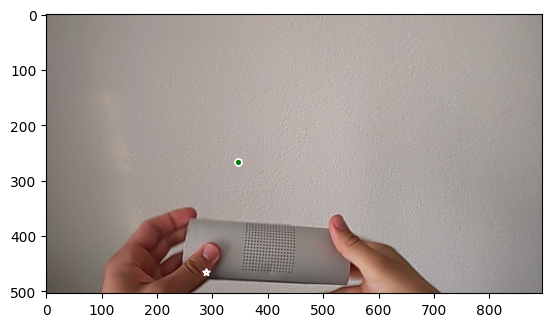

In [10]:
plt.imshow(image)
show_points(input_points, input_labels, plt.gca())
#show_box(input_box, plt.gca())
plt.axis('on')
plt.show()

In [102]:
predictor.set_image(image)

In [12]:
start = time.time()
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    point_coords = input_points,
    point_labels = input_labels)
print(f"Segmentation took {time.time() - start}s")

Segmentation took 26.852402210235596s


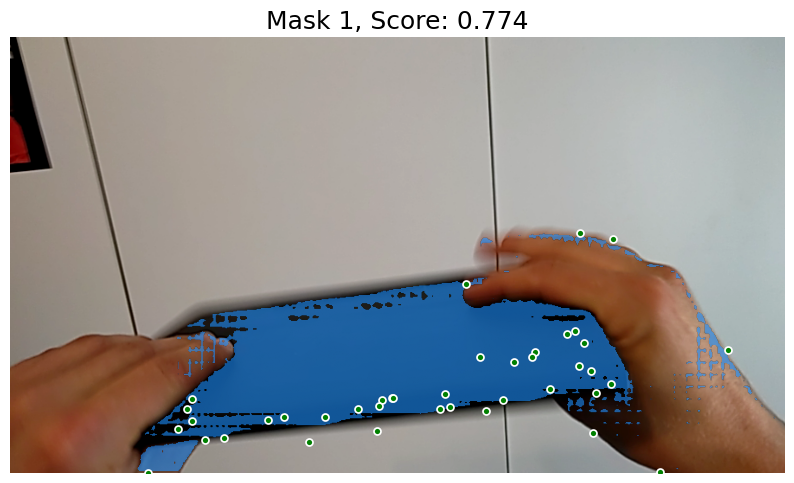

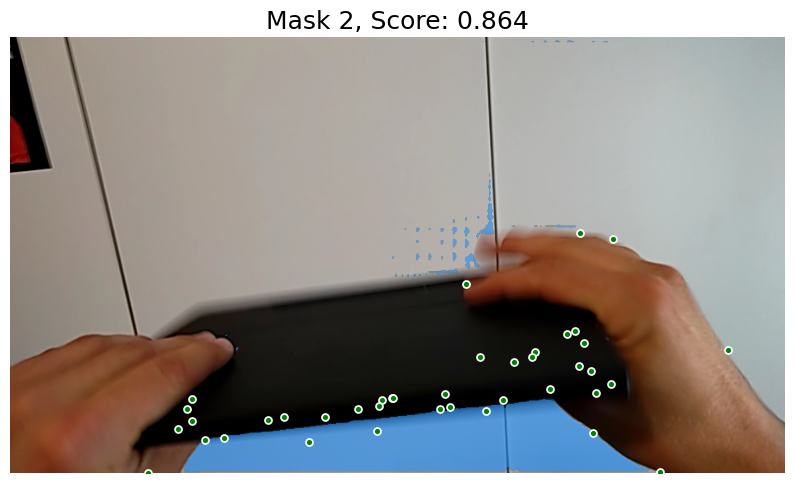

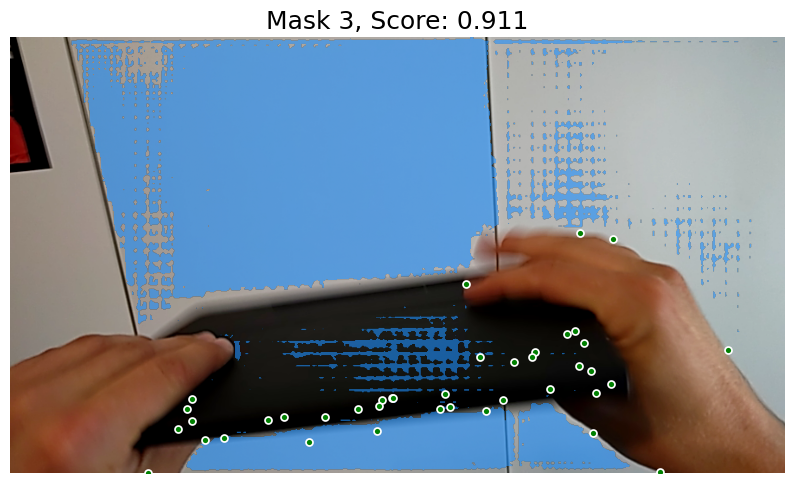

In [123]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_points(input_points, input_labels, plt.gca())
    show_mask(mask, plt.gca())
    #show_points(input_points, input_labels, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show() 